# ED Admission: Time Series Analysis #

In [1]:
# Importing the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

# Read cleaned train data:
df_cleaned = pd.read_csv('ED_train_cleaned.csv', index_col='Admission_Date', parse_dates=True)

# Remove unnamed column:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

# Check dataframe info.:
df_cleaned.info()

# Check number of missing values:
df_cleaned.isnull().sum()

# Check drop duplicates: drop 288 rows
df_cleaned = df_cleaned.drop_duplicates()

# Filtered dataframe by Admit label: '0':non-admitted, '1':admitted #
###############################################################################
df_admit_0 = df_cleaned[df_cleaned['Admit'] == 0] # only ED non-admitted patients
df_admit_1 = df_cleaned[df_cleaned['Admit'] == 1] # only ED admitted patients

# Compute summary statistics #
###############################################################################
# ED admitted patients only:
df_cleaned_stat = df_cleaned.describe().T
# Reorder columns order in summary dataframe
df_cleaned_stat = df_cleaned_stat[['count','min','max','mean','25%','50%','75%','std']]
# Drop 'Admit' column:
df_cleaned_stat = df_cleaned_stat.drop(['Admit'])
# Print summary stat.:
df_cleaned_stat

C:\Users\yoots\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60445 entries, 2013-11-17 to 2011-11-05
Data columns (total 25 columns):
Gender                 60445 non-null object
Ethnicity              60445 non-null object
LIHN                   60445 non-null object
Avg_Income             60445 non-null float64
Distance               60445 non-null float64
GP_Visits              60445 non-null int64
ED_Visits              60445 non-null int64
Specialist_Visits      60445 non-null int64
Hospital_Admissions    60445 non-null int64
Total_Visits           60445 non-null int64
MRI_Count              60445 non-null int64
GP_Code                60445 non-null object
Pain_Score             60445 non-null int64
Allergy                60445 non-null object
Previous_Medication    60445 non-null int64
Family_History         60445 non-null object
Symptom2Visit_Days     60445 non-null int64
Test_A                 60445 non-null object
Test_B                 60445 non-null float64
Test_C                 60

,count,min,max,mean,25%,50%,75%,std
Avg_Income,60340.0,7117.000000,200001.000000,46112.457193,35135.000000,42247.000000,51937.000000,17875.934691
Distance,60340.0,0.417124,1154.751207,271.687340,139.593732,168.112133,314.192043,251.284897
GP_Visits,60340.0,0.000000,56.000000,1.254806,0.000000,1.000000,2.000000,1.721870
ED_Visits,60340.0,0.000000,8.000000,0.358303,0.000000,0.000000,1.000000,0.556544
Specialist_Visits,60340.0,0.000000,9.000000,0.556430,0.000000,0.000000,1.000000,0.656339
Hospital_Admissions,60340.0,0.000000,5.000000,0.042012,0.000000,0.000000,0.000000,0.230380
Total_Visits,60340.0,1.000000,58.000000,2.211601,1.000000,2.000000,3.000000,1.919398
MRI_Count,60340.0,0.000000,2.000000,0.037521,0.000000,0.000000,0.000000,0.195707
Pain_Score,60340.0,1.000000,5.000000,4.085350,3.000000,5.000000,5.000000,1.446187
Previous_Medication,60340.0,0.000000,3.000000,0.055171,0.000000,0.000000,0.000000,0.244983


## Correlation Matrix Plot: numerical features only ##
Interested in finding high value of pearson correlation among ED admission dataset.

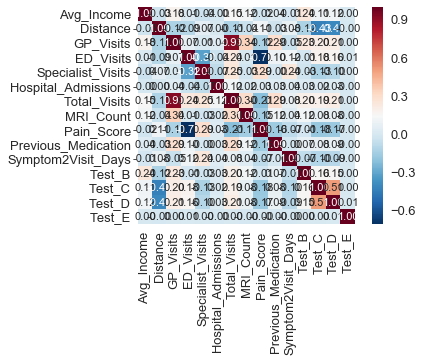

In [2]:
#############################################
## Correlation Matrix: numerical features  ##
#############################################
num_cols = ['Avg_Income', 'Distance', 'GP_Visits', 'ED_Visits', 
            'Specialist_Visits', 'Hospital_Admissions', 'Total_Visits', 
            'MRI_Count', 'Pain_Score', 'Previous_Medication', 'Symptom2Visit_Days', 
            'Test_B', 'Test_C', 'Test_D', 'Test_E']

# Plot correlation matrix: numerical features only
cm = np.corrcoef(df_cleaned[num_cols].values.T)
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cmap='RdBu_r', cbar=True,
                 annot=True, square=True, fmt='.2f',
                 annot_kws={'size':11}, yticklabels=num_cols, xticklabels=num_cols)
plt.show()

## Time-Series: ED admission comparison by ED admitted vs. non-admitted ##

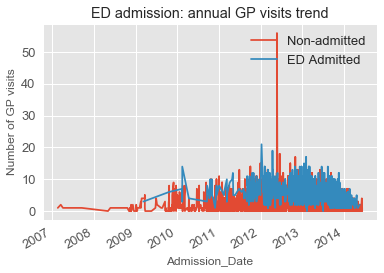

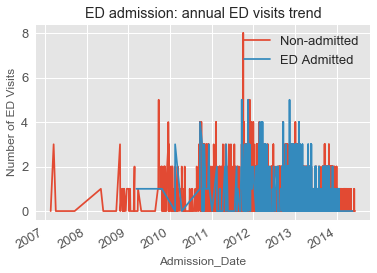

In [3]:
# Plot style use:
plt.style.use('ggplot')

## Compare ED admitted vs. ED-non admitted populations ##
df_grp = df_cleaned.sort_index().groupby('Admit') # Grouped dataframe by 'Admit' flag

# time-series: GP_Visits
plt.figure()
df_grp['GP_Visits'].plot(title='ED admission: annual GP visits trend', label=df_grp['Admit'])
plt.ylabel('Number of GP visits')
plt.legend(('Non-admitted','ED Admitted'), loc='upper right')
plt.show()

# time-series: ED_Visits
plt.figure()
df_grp['ED_Visits'].plot(title='ED admission: annual ED visits trend', label=df_grp['Admit'])
plt.ylabel('Number of ED Visits')
plt.legend(('Non-admitted','ED Admitted'), loc='upper right')
plt.show()

### Interpretation ###
Since the nature of dataset is very noisy, barely able to observe any useful trends on GP visits and ED visits. 

## Time-Series: slicing data by admission date ##
This time, let us try to slice the data by admission date index. We will beign looking at only Jan & Feb of 2010 only.

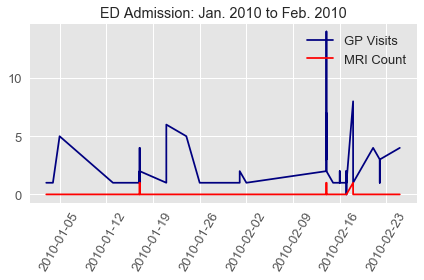

In [4]:
## Time-Series: Slicing ##
###############################################################################
# take GP_visits only:
gp_visits = df_cleaned['GP_Visits'].sort_index()
gp_2010_jan_feb = gp_visits['2010-01':'2010-02'] # sliced Jan & Feb 2010 only

# take MRI_Count only:
mri_count = df_cleaned['MRI_Count'].sort_index()
mri_2010_jan_feb = mri_count['2010-01':'2010-02'] # sliced Jan & Feb 2010 only

# Time-Series Plot: GP visits & MRI count
plt.plot(gp_2010_jan_feb, color='navy',
         label='GP Visits')
plt.plot(mri_2010_jan_feb, color='red',
         label='MRI Count')
plt.legend(loc='upper right')
plt.title('ED Admission: Jan. 2010 to Feb. 2010')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Time-Series: ED Admission by date ##
Let's setup a marker on average GP visits which occured in Jan 15, 2010.

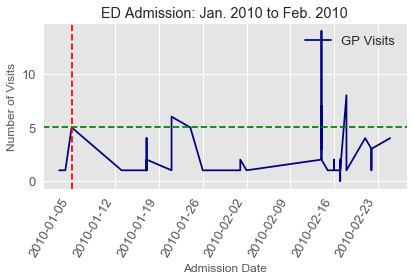

In [5]:
## Set markers ##
###############################################################################
ax = gp_2010_jan_feb.plot(color='navy',
         label='GP Visits')
ax.set_xlabel('Admission Date')
ax.set_ylabel('Number of Visits')
ax.axvline('2010-01-05', color='red', linestyle='--')
ax.axhline(5, color='green', linestyle='--')
plt.legend(loc='upper right')
plt.title('ED Admission: Jan. 2010 to Feb. 2010')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Moving Average Model: GP Visits ##
This time, let us compute 'Moving Average of GP visits over 52 weeks from 2009 to 2014.

Still the data is quite noisy but the trends are more observable than before without averaging data.

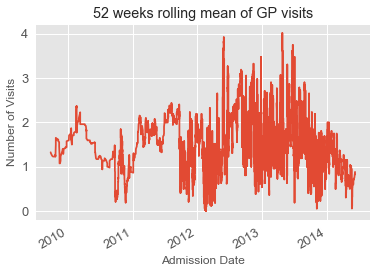

In [6]:
## Moving Average Model ##
###############################################################################
gp_visits_mean = gp_visits.rolling(window=52).mean()
ax = gp_visits_mean.plot()
ax.set_xlabel('Admission Date')
ax.set_ylabel('Number of Visits')
ax.set_title('52 weeks rolling mean of GP visits')
plt.show()

## Aggregate GP Visits: over month from 2009 to 2014 ##
Now, let's observe any typical monthly pattern on how GP visits occurred from 2009 to 2014.

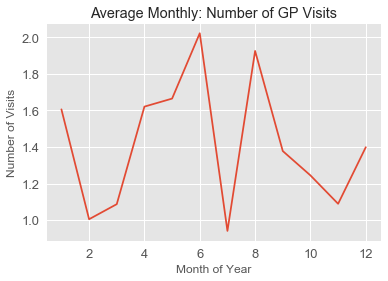

In [7]:
## Plot aggregate values of GP visits over month ##
###############################################################################
index_month = gp_visits.index.month # set index_month
gp_visits_by_month = gp_visits.groupby(index_month).mean()
ax = gp_visits_by_month.plot()
ax.set_xlabel('Month of Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Average Monthly: Number of GP Visits')
plt.show()

## Auto-correlation: GP Visits from ED Admission dataset ##
* Figure 1. Auto-correlation of GP Visits
* Figure 2. Partial auto-correlation of GP Visits

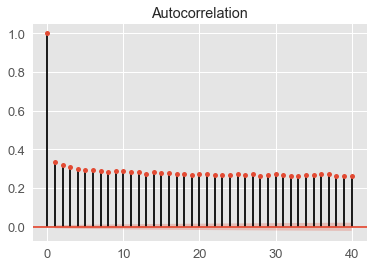

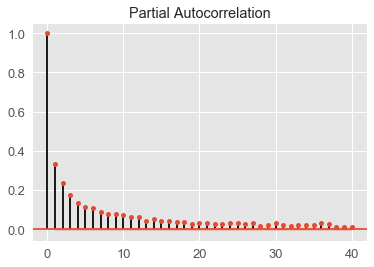

In [8]:
## Plotting auto-correlation ##
###############################################################################
fig = tsaplots.plot_acf(df_cleaned['GP_Visits'], lags=40)
plt.show()

## Plotting partial auto-correlation ##
###############################################################################
fig = tsaplots.plot_pacf(df_cleaned['GP_Visits'], lags=40)
plt.show()

## Time-Series Decomposition: GP Visits ##
Now, using decomposition library from statsmodel package, we will decomposed observed pattern of GP visits into 3 major components.
* Trend: a general systematic linear or non-linear component of data
* Seasonality: a general systematiclinear or non-linear component change over time and does repeat pattern
* Residual (noisy): a non-systematic component that is nor trend/seasonality within data

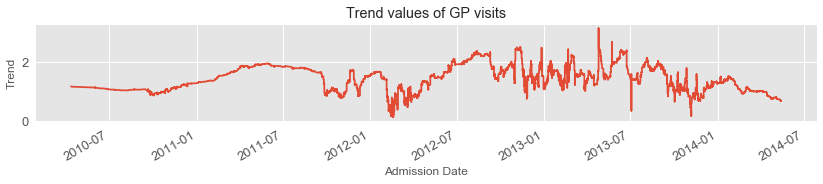

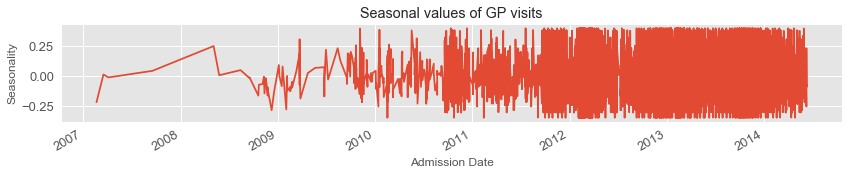

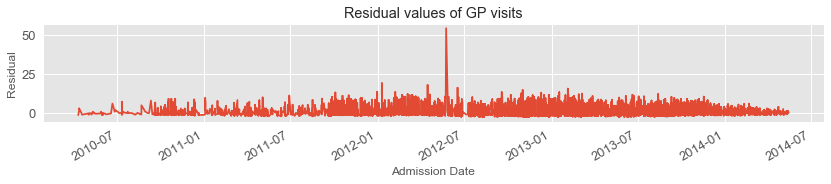

In [9]:
## Time-Series decomposition ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp = sm.tsa.seasonal_decompose(gp_visits, freq=365)
#fig = decomp.plot()
#plt.show()

# Extracting components from time series decomposition:
###############################################################################
#print(dir(decomp))

# Trend component:
###############################################################################
decomp_trend = decomp.trend
ax = decomp_trend.plot(figsize=(14,2))
ax.set_xlabel('Admission Date')
ax.set_ylabel('Trend')
ax.set_title('Trend values of GP visits')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp.seasonal
ax = decomp_seasonal.plot(figsize=(14,2))
ax.set_xlabel('Admission Date')
ax.set_ylabel('Seasonality')
ax.set_title('Seasonal values of GP visits')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp.resid
ax = decomp_resid.plot(figsize=(14,2))
ax.set_xlabel('Admission Date')
ax.set_ylabel('Residual')
ax.set_title('Residual values of GP visits')
plt.show()

## Compute correlations & Clustermap: among top 5 numerical features ##

                     GP_Visits  MRI_Count  Previous_Medication    Test_B  \
GP_Visits             1.000000   0.340042             0.286954  0.233349   
MRI_Count             0.340042   1.000000             0.115486  0.123688   
Previous_Medication   0.286954   0.115486             1.000000  0.073755   
Test_B                0.233349   0.123688             0.073755  1.000000   
Avg_Income            0.179503   0.123011             0.038771  0.240965   

                     Avg_Income  
GP_Visits              0.179503  
MRI_Count              0.123011  
Previous_Medication    0.038771  
Test_B                 0.240965  
Avg_Income             1.000000  


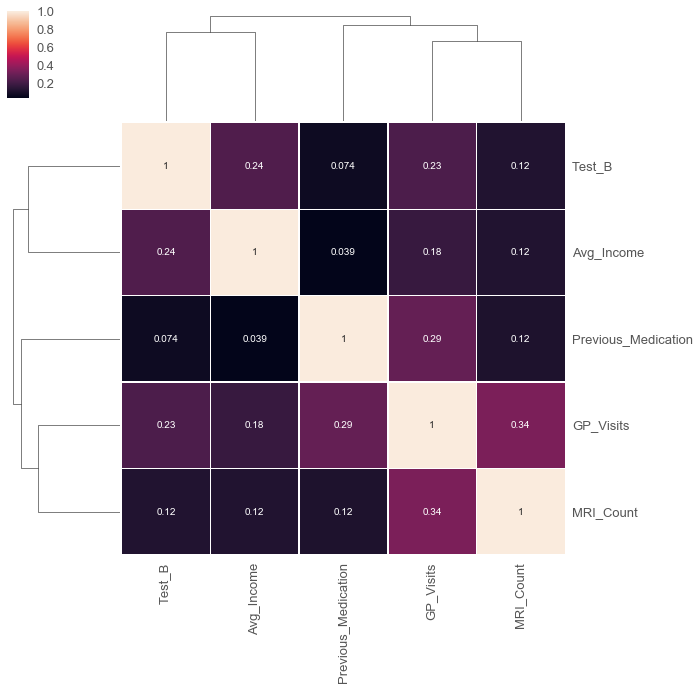

In [10]:
## Compute correlations ##
###############################################################################
#from scipy.stats.stats import pearsonr
ED_corr_p = df_cleaned[['GP_Visits','MRI_Count',
                        'Previous_Medication','Test_B','Avg_Income']].corr(method='pearson')
print(ED_corr_p)

# Clustermap:
sns.clustermap(ED_corr_p, annot=True, linewidth=0.4)
plt.show()

## Aggregate of all visit types ED Admission: over month from 2009 to 2014 ##
Now, let's observe any typical monthly pattern on all visity types occurred from 2009 to 2014.

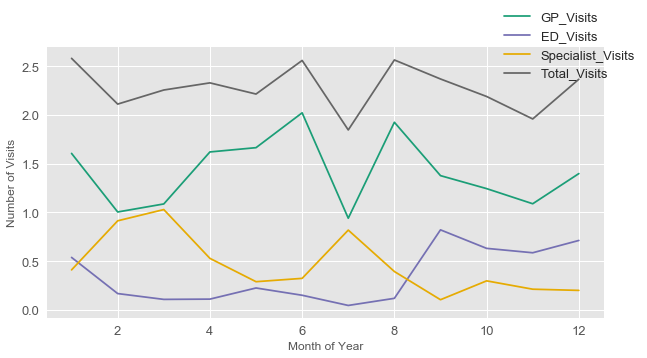

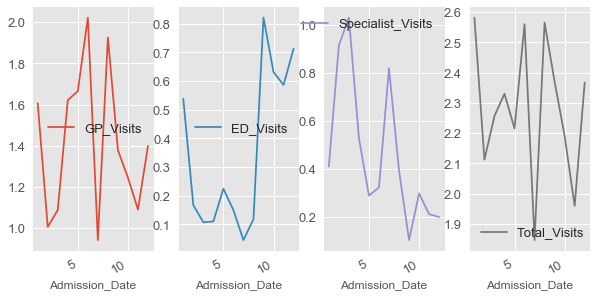

In [11]:
## Plot aggregate values of all visit types over month ##
###############################################################################
index_month = df_cleaned.index.month # set index_month
ed_admission_by_month = df_cleaned.iloc[:,:-1].groupby(index_month).mean()

visit_cols = ['GP_Visits','ED_Visits','Specialist_Visits','Total_Visits'] # Visit type columns

## Single plot: moving average of all ED admission visit types ##
ax = ed_admission_by_month.loc[:, visit_cols].plot(figsize=(10,5), colormap='Dark2')
ax.set_xlabel('Month of Year')
ax.set_ylabel('Number of Visits')
ax.legend(bbox_to_anchor=(0.8, 1.0), loc='center left')
plt.show()

## Facet plots: moving average plots ##
ed_admission_by_month.loc[:, visit_cols].plot(subplots=True,
                         layout=(1,4),
                         figsize=(10,5),
                         sharex=True,
                         sharey=False)
plt.show()

## Resampling: ED Admission data ##
There were quite number of missing admission date on certain year (i.e., 2007). Thus, we decided to test the feasibility of resampling admission data points in following manner.
* Step1: interpolate missing date between 2007 to 2014 at daily freq.
* Step2: resample time point and aggregate by mean over month from 2007 to 2014.

In [12]:
# Filtered "numerical features" only:
# Use num_cols: Avg_Income, Distance, GP_Visits, ..., ED_Visits

# Resampling at daily freq.: numerical features
df_daily = df_cleaned.loc[:, num_cols].resample('D').first().interpolate('linear')
# Check missing time point:
df_daily.isnull().sum()

# Resampling from imputed daily freq. --> monthly freq. aggregated by mean:
df_monthly = df_daily.resample('M').mean()
df_monthly.isnull().sum()

Avg_Income             0
Distance               0
GP_Visits              0
ED_Visits              0
Specialist_Visits      0
Hospital_Admissions    0
Total_Visits           0
MRI_Count              0
Pain_Score             0
Previous_Medication    0
Symptom2Visit_Days     0
Test_B                 0
Test_C                 0
Test_D                 0
Test_E                 0
dtype: int64

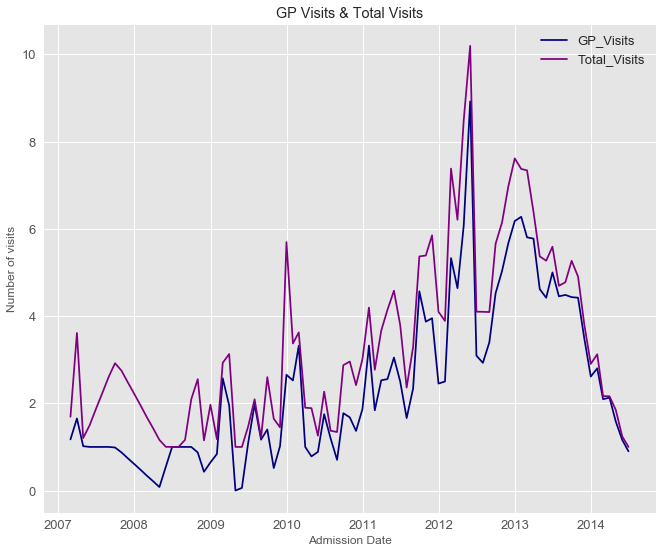

In [13]:
## Time-Series: ED Admission (monthly) ##
###############################################################################
# Plotting on common axes:
plt.figure()
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.plot(df_monthly['Total_Visits'], 'purple')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits & Total Visits')
plt.legend(('GP_Visits','Total_Visits'), loc='upper right')
plt.show()

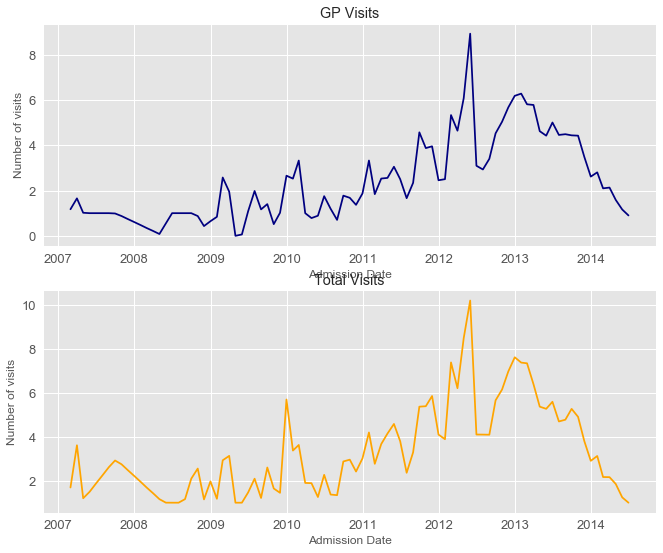

In [14]:
## Time-Series: ED Admission (monthly) ##
###############################################################################
# Plotting Using subplots(): 
# Plot #1: GP visits & Total visits
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits')

plt.subplot(2,1,2)
plt.plot(df_monthly['Total_Visits'], 'orange')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('Total Visits')
plt.show()

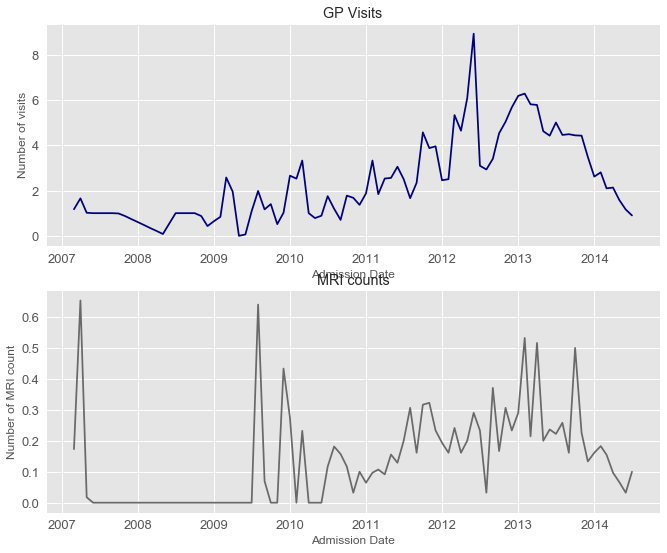

In [15]:
# Plot #2: GP visits & MRI count
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits')

plt.subplot(2,1,2)
plt.plot(df_monthly['MRI_Count'], 'dimgray')
plt.xlabel('Admission Date')
plt.ylabel('Number of MRI count')
plt.title('MRI counts')
plt.show()

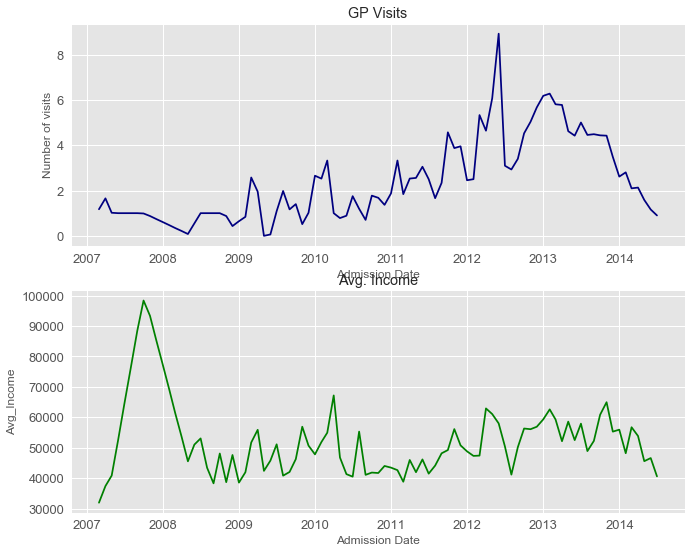

In [16]:
# Plot #3: GP visits & Avg. Income
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits')

plt.subplot(2,1,2)
plt.plot(df_monthly['Avg_Income'], 'green')
plt.xlabel('Admission Date')
plt.ylabel('Avg_Income')
plt.title('Avg. Income')
plt.show()

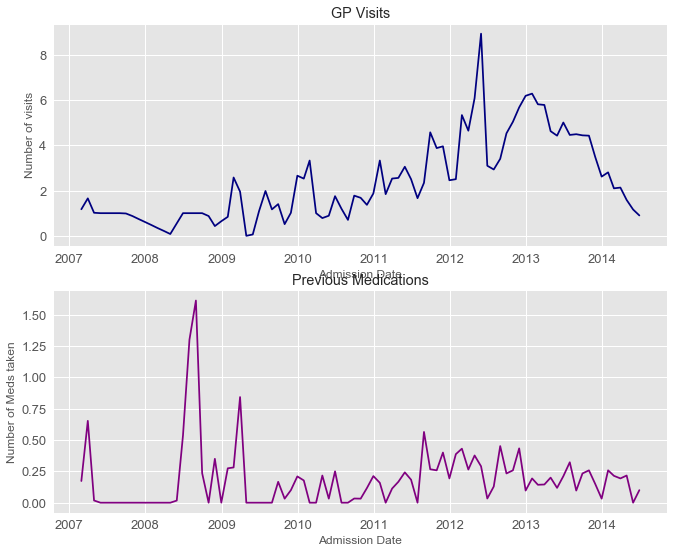

In [17]:
# Plot #4: GP visits & Previous_Meds
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits')

plt.subplot(2,1,2)
plt.plot(df_monthly['Previous_Medication'], 'purple')
plt.xlabel('Admission Date')
plt.ylabel('Number of Meds taken')
plt.title('Previous Medications')
plt.show()

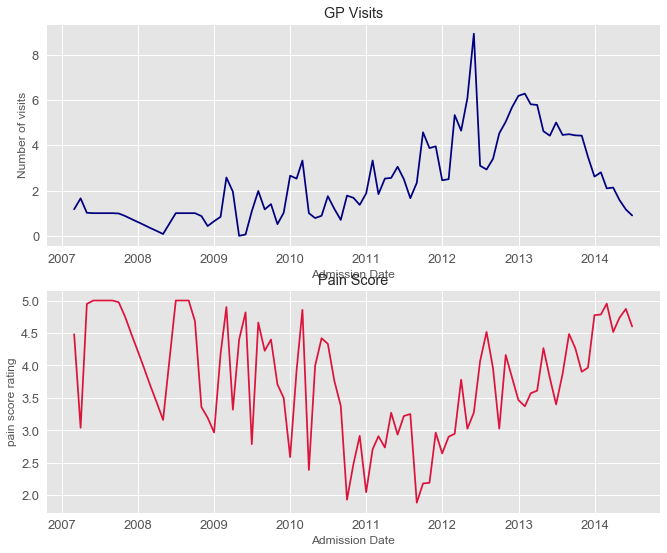

In [18]:
# Plot #5: GP visits & Pain_Score
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits')

plt.subplot(2,1,2)
plt.plot(df_monthly['Pain_Score'], 'crimson')
plt.xlabel('Admission Date')
plt.ylabel('pain score rating')
plt.title('Pain Score')
plt.show()

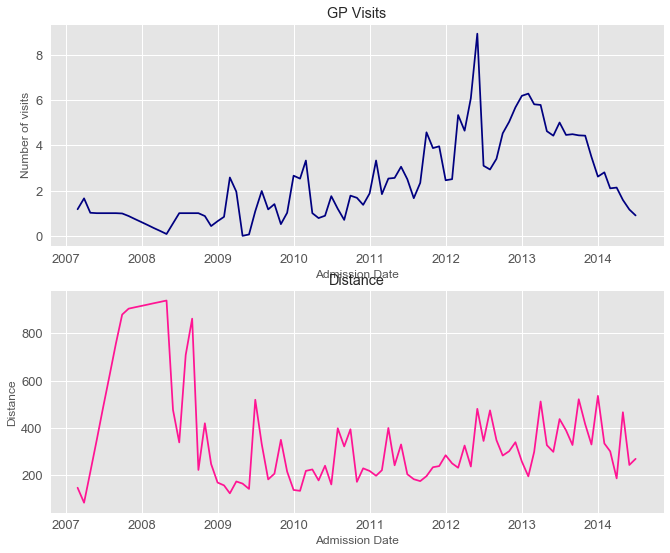

In [19]:
# Plot #6: GP visits & Distance
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_monthly['GP_Visits'], 'navy')
plt.xlabel('Admission Date')
plt.ylabel('Number of visits')
plt.title('GP Visits')

plt.subplot(2,1,2)
plt.plot(df_monthly['Distance'], 'deeppink')
plt.xlabel('Admission Date')
plt.ylabel('Distance')
plt.title('Distance')
plt.show()

## Time-Series Decomposition: Resampled data by monthly ##
Now, using decomposition library from statsmodel package, we will decomposed observed pattern of monthly resampled dataframe into 3 major components.
* Trend: a general systematic linear or non-linear component of data
* Seasonality: a general systematiclinear or non-linear component change over time and does repeat pattern
* Residual (noisy): a non-systematic component that is nor trend/seasonality within data

### Resampled monthly: GP Visits ###

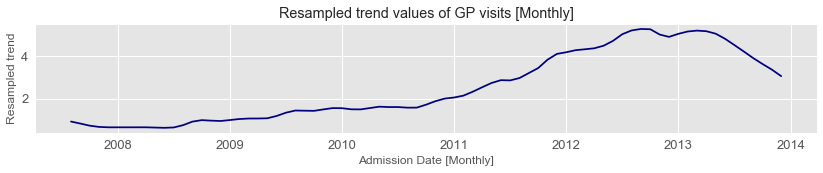

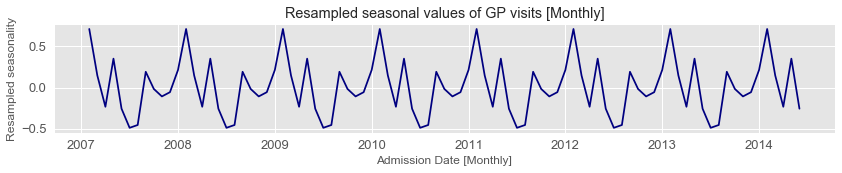

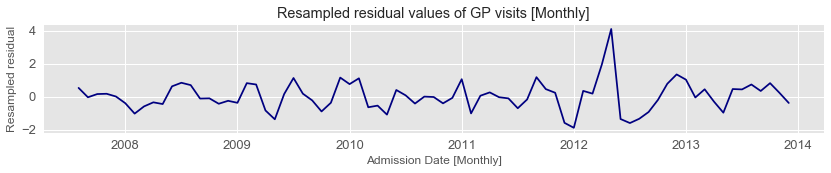

In [20]:
gp_visits_monthly = df_monthly['GP_Visits'].sort_index()

## Time-Series decomposition: Resampled GP visits by monthly ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp_gp_monthly = sm.tsa.seasonal_decompose(gp_visits_monthly, freq=12)
#fig = decomp_gp_monthly.plot()
#plt.show()

# Trend component:
###############################################################################
decomp_trend = decomp_gp_monthly.trend
ax = decomp_trend.plot(figsize=(14,2), color='navy')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled trend')
ax.set_title('Resampled trend values of GP visits [Monthly]')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp_gp_monthly.seasonal
ax = decomp_seasonal.plot(figsize=(14,2), color='navy')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled seasonality')
ax.set_title('Resampled seasonal values of GP visits [Monthly]')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp_gp_monthly.resid
ax = decomp_resid.plot(figsize=(14,2), color='navy')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled residual')
ax.set_title('Resampled residual values of GP visits [Monthly]')
plt.show()

### Resampled monthly: MRI Count ###

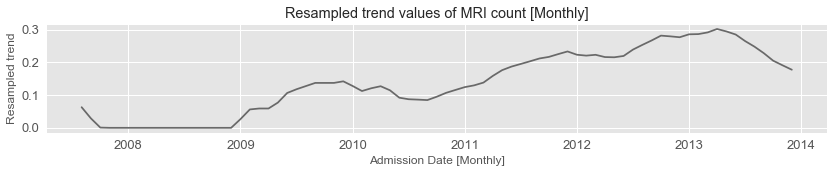

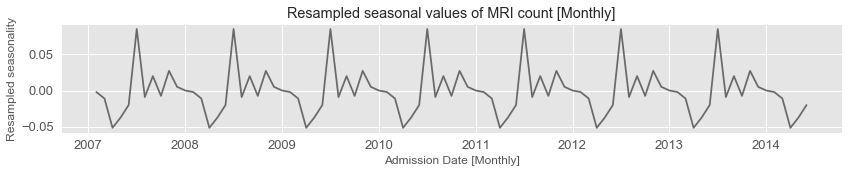

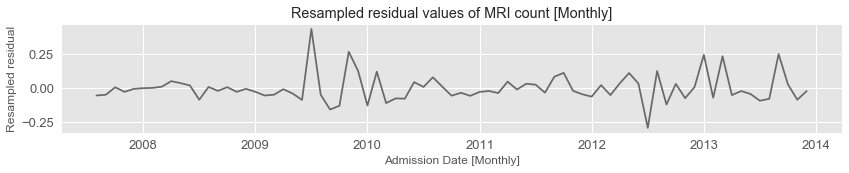

In [21]:
# Resampled monthly: MRI Count #
###############################################################################
mri_count_monthly = df_monthly['MRI_Count'].sort_index()

## Time-Series decomposition: Resampled MRI count by monthly ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp_mri_monthly = sm.tsa.seasonal_decompose(mri_count_monthly, freq=12)
#fig = decomp_mri_monthly.plot()
#plt.show()

# Trend component:
###############################################################################
decomp_trend = decomp_mri_monthly.trend
ax = decomp_trend.plot(figsize=(14,2), color='dimgray')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled trend')
ax.set_title('Resampled trend values of MRI count [Monthly]')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp_mri_monthly.seasonal
ax = decomp_seasonal.plot(figsize=(14,2), color='dimgray')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled seasonality')
ax.set_title('Resampled seasonal values of MRI count [Monthly]')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp_mri_monthly.resid
ax = decomp_resid.plot(figsize=(14,2), color='dimgray')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled residual')
ax.set_title('Resampled residual values of MRI count [Monthly]')
plt.show()

### Resampled monthly: Average Income ###

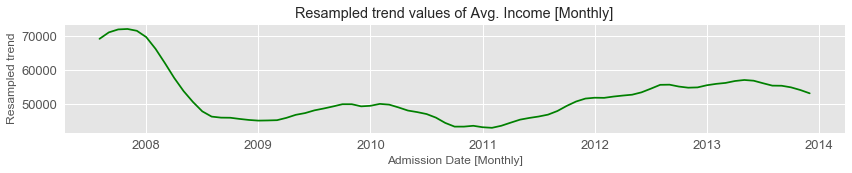

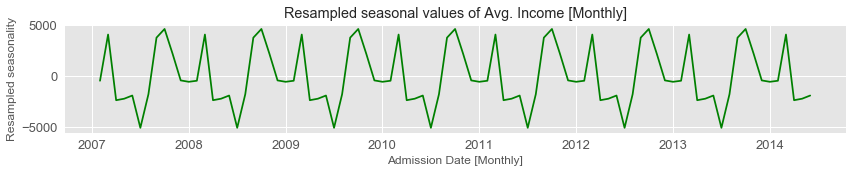

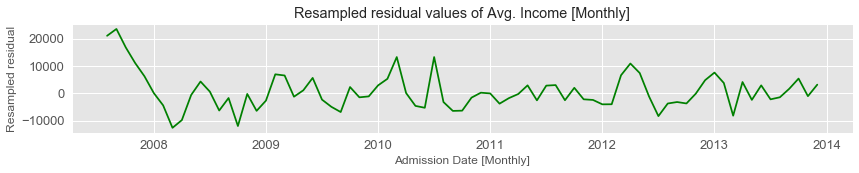

In [22]:
# Resampled monthly: Average Income #
###############################################################################
avg_income_monthly = df_monthly['Avg_Income'].sort_index()

## Time-Series decomposition: Resampled Average Income by monthly ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp_avg_income_monthly = sm.tsa.seasonal_decompose(avg_income_monthly, freq=12)
#fig = decomp_mri_monthly.plot()
#plt.show()

# Trend component:
###############################################################################
decomp_trend = decomp_avg_income_monthly.trend
ax = decomp_trend.plot(figsize=(14,2), color='green')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled trend')
ax.set_title('Resampled trend values of Avg. Income [Monthly]')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp_avg_income_monthly.seasonal
ax = decomp_seasonal.plot(figsize=(14,2), color='green')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled seasonality')
ax.set_title('Resampled seasonal values of Avg. Income [Monthly]')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp_avg_income_monthly.resid
ax = decomp_resid.plot(figsize=(14,2), color='green')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled residual')
ax.set_title('Resampled residual values of Avg. Income [Monthly]')
plt.show()

### Resampled monthly: Previous Medication ###

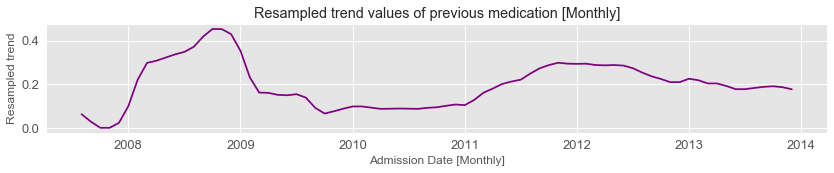

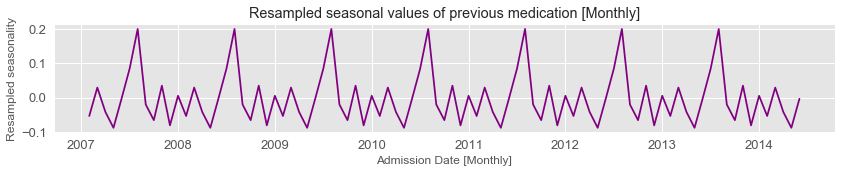

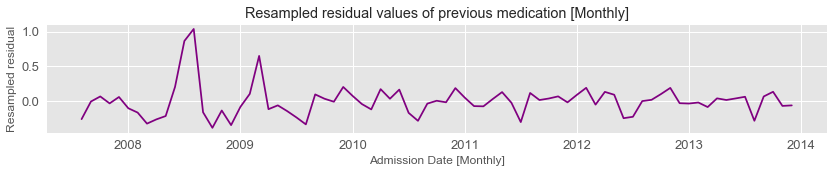

In [23]:
# Resampled monthly: Previous Medication #
###############################################################################
prev_med_monthly = df_monthly['Previous_Medication'].sort_index()

## Time-Series decomposition: Resampled MRI count by monthly ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp_prev_med_monthly = sm.tsa.seasonal_decompose(prev_med_monthly, freq=12)
#fig = decomp_prev_med_monthly.plot()
#plt.show()

# Trend component:
###############################################################################
decomp_trend = decomp_prev_med_monthly.trend
ax = decomp_trend.plot(figsize=(14,2), color='purple')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled trend')
ax.set_title('Resampled trend values of previous medication [Monthly]')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp_prev_med_monthly.seasonal
ax = decomp_seasonal.plot(figsize=(14,2), color='purple')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled seasonality')
ax.set_title('Resampled seasonal values of previous medication [Monthly]')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp_prev_med_monthly.resid
ax = decomp_resid.plot(figsize=(14,2), color='purple')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled residual')
ax.set_title('Resampled residual values of previous medication [Monthly]')
plt.show()

### Resampled monthly: Pain Score ###

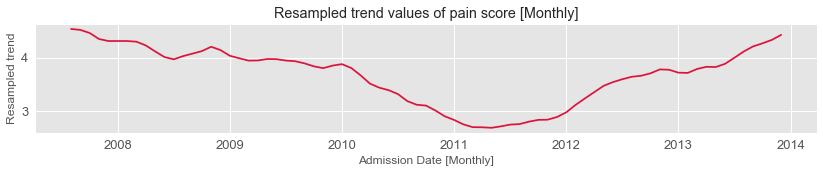

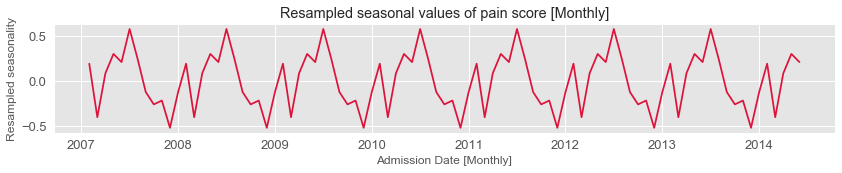

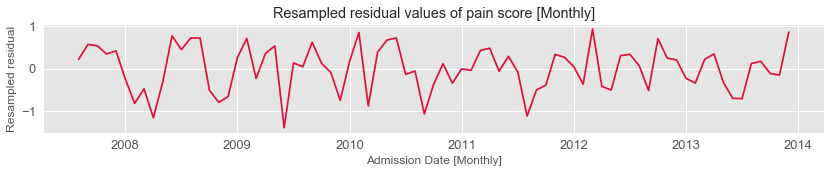

In [24]:
# Resampled monthly: Pain Score #
###############################################################################
pain_score_monthly = df_monthly['Pain_Score'].sort_index()

## Time-Series decomposition: Resampled MRI count by monthly ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp_prev_med_monthly = sm.tsa.seasonal_decompose(pain_score_monthly, freq=12)
#fig = decomp_prev_med_monthly.plot()
#plt.show()

# Trend component:
###############################################################################
decomp_trend = decomp_prev_med_monthly.trend
ax = decomp_trend.plot(figsize=(14,2), color='crimson')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled trend')
ax.set_title('Resampled trend values of pain score [Monthly]')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp_prev_med_monthly.seasonal
ax = decomp_seasonal.plot(figsize=(14,2), color='crimson')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled seasonality')
ax.set_title('Resampled seasonal values of pain score [Monthly]')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp_prev_med_monthly.resid
ax = decomp_resid.plot(figsize=(14,2), color='crimson')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled residual')
ax.set_title('Resampled residual values of pain score [Monthly]')
plt.show()

### Resampled monthly: Distance ###

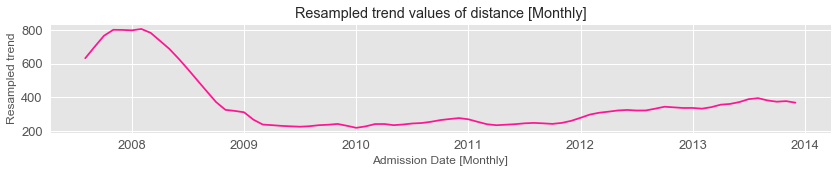

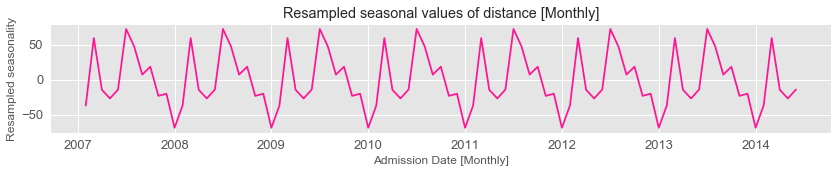

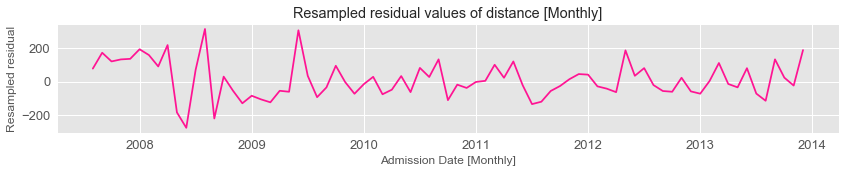

In [25]:
# Resampled monthly: Pain Score #
###############################################################################
distance_monthly = df_monthly['Distance'].sort_index()

## Time-Series decomposition: Resampled MRI count by monthly ##
###############################################################################
# Daily frequency:
###############################################################################
rcParams['figure.figsize'] = 11,9
decomp_dist_monthly = sm.tsa.seasonal_decompose(distance_monthly, freq=12)
#fig = decomp_prev_med_monthly.plot()
#plt.show()

# Trend component:
###############################################################################
decomp_trend = decomp_dist_monthly.trend
ax = decomp_trend.plot(figsize=(14,2), color='deeppink')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled trend')
ax.set_title('Resampled trend values of distance [Monthly]')
plt.show()

# Seasonality component:
###############################################################################
decomp_seasonal = decomp_dist_monthly.seasonal
ax = decomp_seasonal.plot(figsize=(14,2), color='deeppink')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled seasonality')
ax.set_title('Resampled seasonal values of distance [Monthly]')
plt.show()

# Noise component:
###############################################################################
decomp_resid = decomp_dist_monthly.resid
ax = decomp_resid.plot(figsize=(14,2), color='deeppink')
ax.set_xlabel('Admission Date [Monthly]')
ax.set_ylabel('Resampled residual')
ax.set_title('Resampled residual values of distance [Monthly]')
plt.show()